In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_columns', None)

file_path = 'INF002v4.csv'
df = pd.read_csv(file_path)


df.head()


,Hospital.Service.Area,Age.Group,Gender,Race,Ethnicity,Length.of.Stay,Type.of.Admission,Patient.Disposition,Discharge.Year,CCSR.Diagnosis.Code,CCSR.Diagnosis.Description,APR.DRG.Code,APR.DRG.Description,APR.Severity.of.Illness.Code,APR.Severity.of.Illness.Description,APR.Risk.of.Mortality,APR.Medical.Surgical.Description,Payment.Typology.1,Payment.Typology.2,Payment.Typology.3,Emergency.Department.Indicator,Total.Charges,Total.Costs
0,New York City,50 to 69,M,Other Race,Spanish/Hispanic,6,Emergency,Home or Self Care,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,2,Moderate,Moderate,Medical,Medicare,NaN,NaN,Y,"106,218.05","16,630.18"
1,New York City,50 to 69,F,Other Race,Not Span/Hispanic,7,Emergency,Home or Self Care,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,3,Major,Major,Medical,Medicare,Medicaid,NaN,Y,"140,214.34","22,759.75"
2,New York City,70 or Older,M,Multi-racial,Not Span/Hispanic,4,Emergency,Expired,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,4,Extreme,Extreme,Medical,Medicare,Private Health Insurance,NaN,Y,"86,486.64","11,527.78"
3,Hudson Valley,50 to 69,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,2,Moderate,Minor,Medical,Medicare,NaN,NaN,Y,"43,059.62","7,908.61"
4,New York City,70 or Older,F,White,Not Span/Hispanic,3,Emergency,Skilled Nursing Home,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,2,Moderate,Moderate,Medical,Medicare,Medicaid,NaN,Y,"37,861.51","5,701.64"


In [2]:
df['Gender'].value_counts()

Gender
M    14506
F    13600
U        3
Name: count, dtype: int64

In [3]:
df['APR.DRG.Code'].value_counts()

APR.DRG.Code
720    24561
710     2868
890      246
5        245
4         88
892       75
9         16
1          4
6          1
7          1
8          1
956        1
2          1
161        1
Name: count, dtype: int64

In [4]:
df['Payment.Typology.2'].value_counts()

Payment.Typology.2
Medicaid                     6913
Medicare                     3446
Private Health Insurance     2648
Blue Cross/Blue Shield       1888
Self-Pay                     1205
Federal/State/Local/VA        261
Miscellaneous/Other           159
Managed Care, Unspecified      41
Department of Corrections       1
Name: count, dtype: int64

In [5]:
# Convert Blanks and Null into Unknown
df['Hospital.Service.Area'] = df['Hospital.Service.Area'].replace('', 'Unknown')
df['Hospital.Service.Area'] = df['Hospital.Service.Area'].fillna('Unknown')
df['Payment.Typology.2'] = df['Payment.Typology.2'].fillna('Unknown')
df['Payment.Typology.3'] = df['Payment.Typology.3'].fillna('Unknown')

# Remove Gender U 
df = df[df['Gender'] != 'U']

# Remove unique row that cant be split 70:30
df = df[df['Payment.Typology.2'] != 'Department of Corrections']

# Remove unique row that cant be split 70:30
rare_codes = [1, 2, 6, 7, 8, 161,956]
df = df[~df['APR.DRG.Code'].isin(rare_codes)]


df.head()

,Hospital.Service.Area,Age.Group,Gender,Race,Ethnicity,Length.of.Stay,Type.of.Admission,Patient.Disposition,Discharge.Year,CCSR.Diagnosis.Code,CCSR.Diagnosis.Description,APR.DRG.Code,APR.DRG.Description,APR.Severity.of.Illness.Code,APR.Severity.of.Illness.Description,APR.Risk.of.Mortality,APR.Medical.Surgical.Description,Payment.Typology.1,Payment.Typology.2,Payment.Typology.3,Emergency.Department.Indicator,Total.Charges,Total.Costs
0,New York City,50 to 69,M,Other Race,Spanish/Hispanic,6,Emergency,Home or Self Care,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,2,Moderate,Moderate,Medical,Medicare,Unknown,Unknown,Y,"106,218.05","16,630.18"
1,New York City,50 to 69,F,Other Race,Not Span/Hispanic,7,Emergency,Home or Self Care,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,3,Major,Major,Medical,Medicare,Medicaid,Unknown,Y,"140,214.34","22,759.75"
2,New York City,70 or Older,M,Multi-racial,Not Span/Hispanic,4,Emergency,Expired,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,4,Extreme,Extreme,Medical,Medicare,Private Health Insurance,Unknown,Y,"86,486.64","11,527.78"
3,Hudson Valley,50 to 69,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,2,Moderate,Minor,Medical,Medicare,Unknown,Unknown,Y,"43,059.62","7,908.61"
4,New York City,70 or Older,F,White,Not Span/Hispanic,3,Emergency,Skilled Nursing Home,2022,INF002,Septicemia,720,SEPTICEMIA AND DISSEMINATED INFECTIONS,2,Moderate,Moderate,Medical,Medicare,Medicaid,Unknown,Y,"37,861.51","5,701.64"


In [6]:
#Remove Commas,convert String into Float
df['Total.Charges'] = df['Total.Charges'].str.replace(',', '')
df['Total.Charges'] = df['Total.Charges'].astype('float64')
df['Total.Costs'] = df['Total.Costs'].str.replace(',', '')
df['Total.Costs'] = df['Total.Costs'].astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28095 entries, 0 to 28108
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital.Service.Area                28095 non-null  object 
 1   Age.Group                            28095 non-null  object 
 2   Gender                               28095 non-null  object 
 3   Race                                 28095 non-null  object 
 4   Ethnicity                            28095 non-null  object 
 5   Length.of.Stay                       28095 non-null  int64  
 6   Type.of.Admission                    28095 non-null  object 
 7   Patient.Disposition                  28095 non-null  object 
 8   Discharge.Year                       28095 non-null  int64  
 9   CCSR.Diagnosis.Code                  28095 non-null  object 
 10  CCSR.Diagnosis.Description           28095 non-null  object 
 11  APR.DRG.Code                     

C:\Users\hp\AppData\Local\Temp\ipykernel_1088\2102059121.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age.Group', y='Length.of.Stay', hue='Gender', data=df, ci=None)


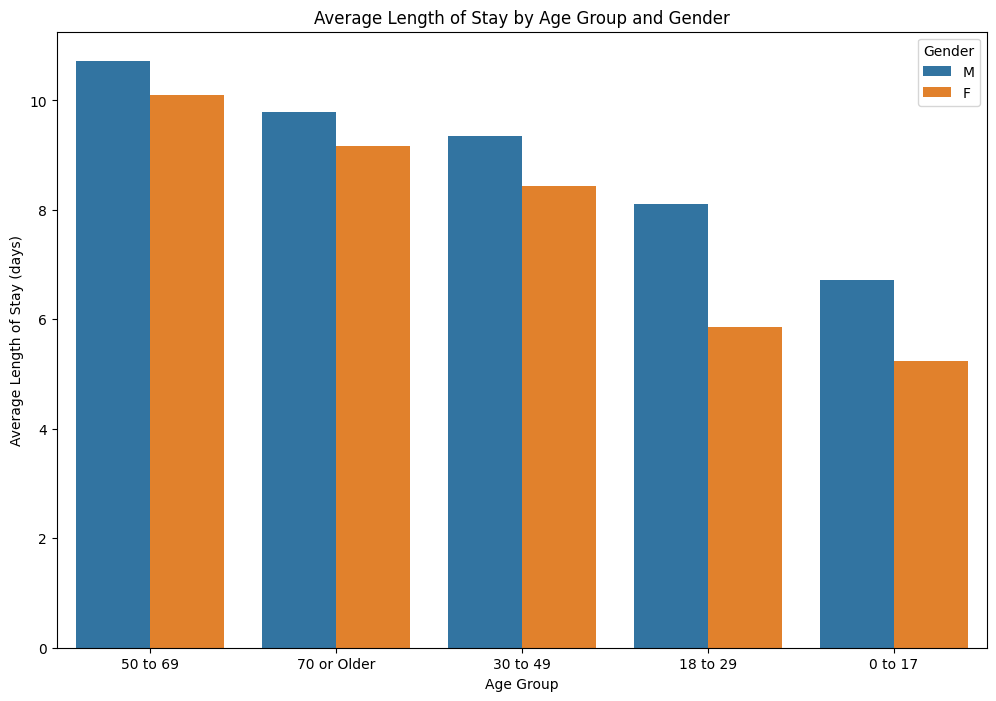

In [8]:
# Plotting Avg length of stay by age group and gender
plt.figure(figsize=(12, 8))
sns.barplot(x='Age.Group', y='Length.of.Stay', hue='Gender', data=df, ci=None)
plt.title('Average Length of Stay by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Length of Stay (days)')
plt.legend(title='Gender')
plt.show()

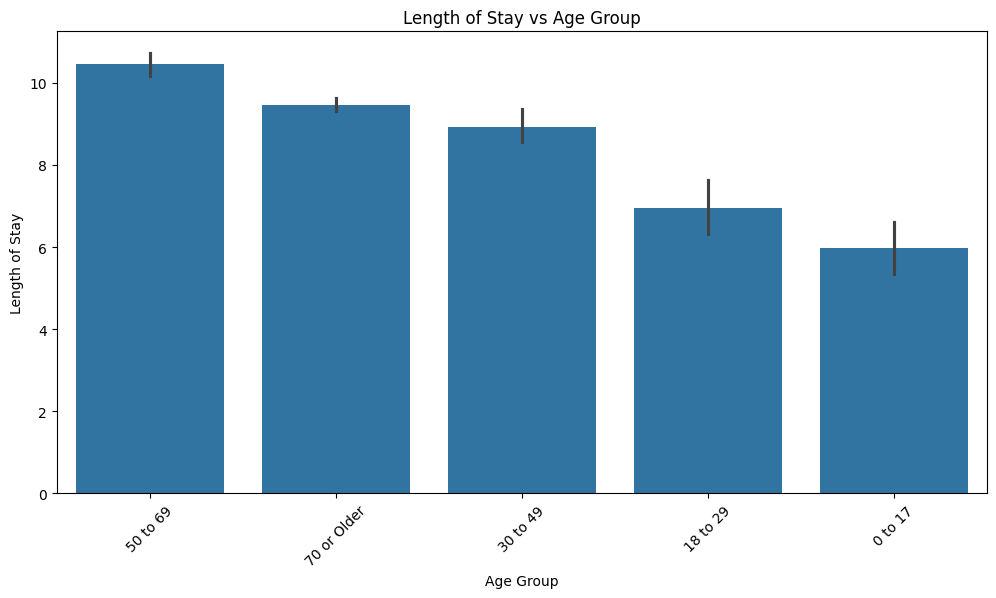

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age.Group', y='Length.of.Stay', data=df)
plt.title('Length of Stay vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Length of Stay')
plt.xticks(rotation=45)
plt.show()

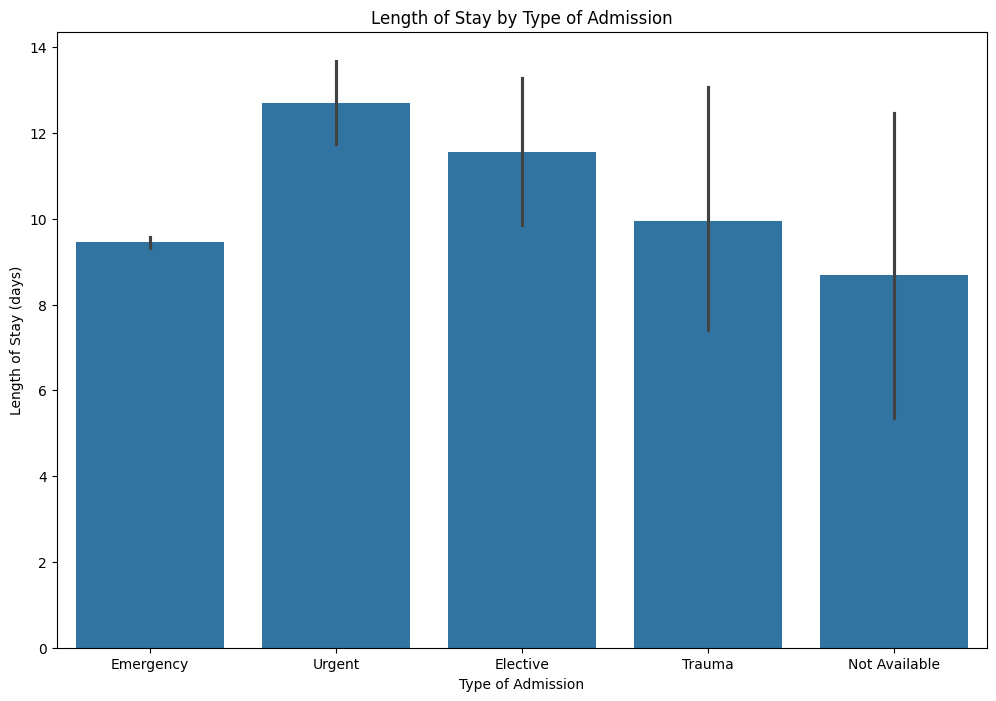

In [10]:

# Plotting Length of Stay by Type of Admission
plt.figure(figsize=(12, 8))
sns.barplot(x='Type.of.Admission', y='Length.of.Stay', data=df)
plt.title('Length of Stay by Type of Admission')
plt.xlabel('Type of Admission')
plt.ylabel('Length of Stay (days)')
plt.show()


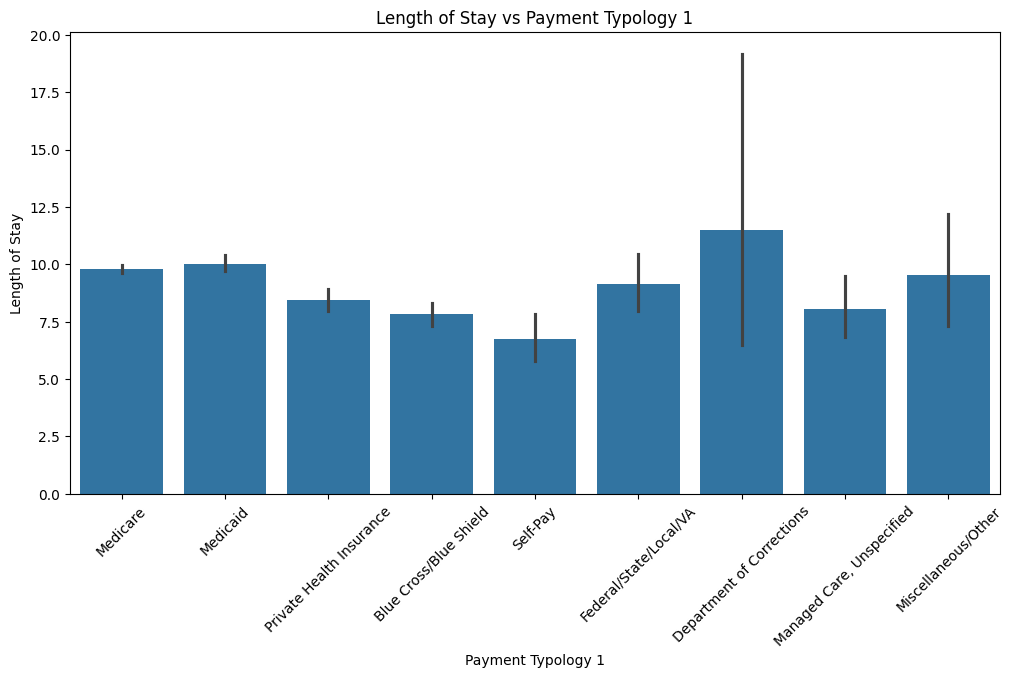

In [11]:
#Length of stay vs payment typology 1
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment.Typology.1', y='Length.of.Stay', data=df)
plt.title('Length of Stay vs Payment Typology 1')
plt.xlabel('Payment Typology 1')
plt.ylabel('Length of Stay')
plt.xticks(rotation=45)
plt.show()

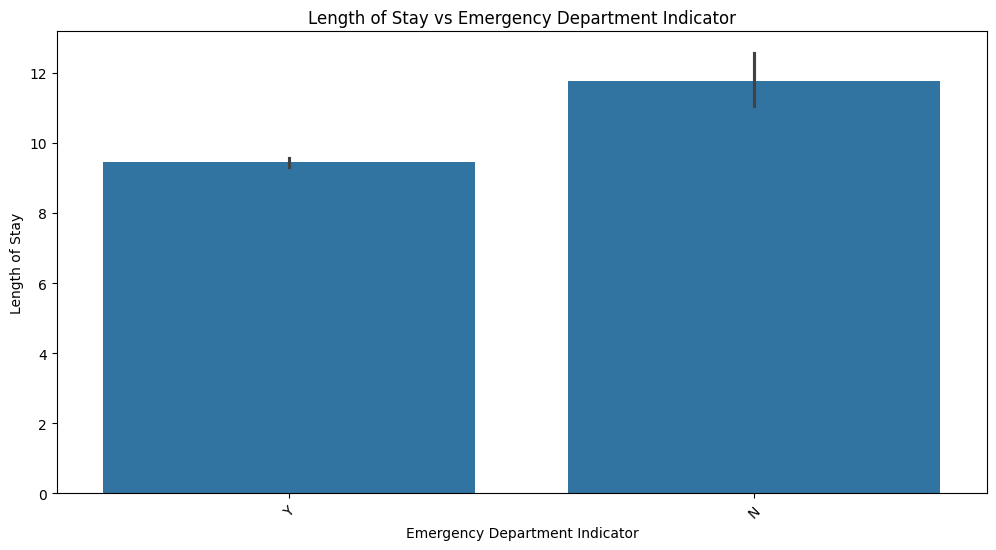

In [12]:
#Length of stay vs emergency department indicator
plt.figure(figsize=(12, 6))
sns.barplot(x='Emergency.Department.Indicator', y='Length.of.Stay', data=df)
plt.title('Length of Stay vs Emergency Department Indicator')
plt.xlabel('Emergency Department Indicator')
plt.ylabel('Length of Stay')
plt.xticks(rotation=45)
plt.show()

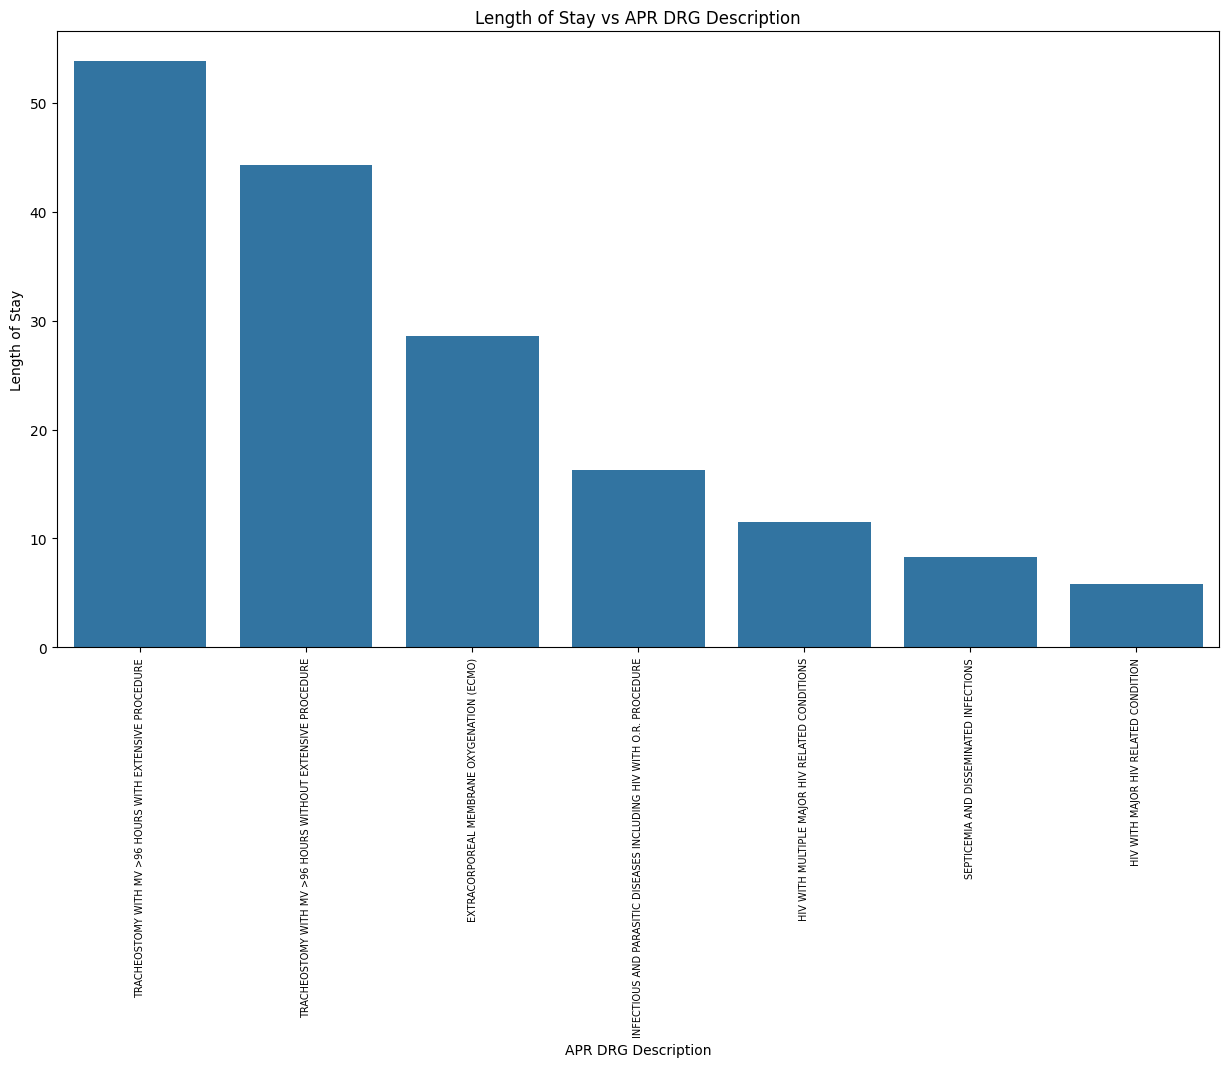

In [13]:
#Length of stay vs apr drg description
# Calculate mean length of stay for APR DRG Description
mean_length_of_stay = df.groupby('APR.DRG.Description')['Length.of.Stay'].mean().reset_index()

# Sort values
mean_length_of_stay = mean_length_of_stay.sort_values(by='Length.of.Stay', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='APR.DRG.Description', y='Length.of.Stay', data=mean_length_of_stay)
plt.title('Length of Stay vs APR DRG Description')
plt.xlabel('APR DRG Description')
plt.ylabel('Length of Stay')
plt.xticks(rotation=90, fontsize=7)
plt.show()

In [14]:
# Reduce dataset to viable columns only 
columns_to_keep = [
    'Hospital.Service.Area',
    'Age.Group',
    'Gender',
    'Race',
    'Ethnicity',
    'Length.of.Stay',
    'Type.of.Admission',
    'APR.DRG.Code',
    'APR.Severity.of.Illness.Code',
    'APR.Risk.of.Mortality',
    'APR.Medical.Surgical.Description',
    'Payment.Typology.1',
    'Payment.Typology.2',
    'Payment.Typology.3',
    'Emergency.Department.Indicator'
]


df_reduced = df[columns_to_keep]


df_reduced.head()

,Hospital.Service.Area,Age.Group,Gender,Race,Ethnicity,Length.of.Stay,Type.of.Admission,APR.DRG.Code,APR.Severity.of.Illness.Code,APR.Risk.of.Mortality,APR.Medical.Surgical.Description,Payment.Typology.1,Payment.Typology.2,Payment.Typology.3,Emergency.Department.Indicator
0,New York City,50 to 69,M,Other Race,Spanish/Hispanic,6,Emergency,720,2,Moderate,Medical,Medicare,Unknown,Unknown,Y
1,New York City,50 to 69,F,Other Race,Not Span/Hispanic,7,Emergency,720,3,Major,Medical,Medicare,Medicaid,Unknown,Y
2,New York City,70 or Older,M,Multi-racial,Not Span/Hispanic,4,Emergency,720,4,Extreme,Medical,Medicare,Private Health Insurance,Unknown,Y
3,Hudson Valley,50 to 69,M,White,Not Span/Hispanic,3,Emergency,720,2,Minor,Medical,Medicare,Unknown,Unknown,Y
4,New York City,70 or Older,F,White,Not Span/Hispanic,3,Emergency,720,2,Moderate,Medical,Medicare,Medicaid,Unknown,Y


In [15]:
# Convert string column into category 
for column in df_reduced.columns:
    if df_reduced[column].dtype == 'object':
        df_reduced[column] = df_reduced[column].astype('category').cat.codes


df_reduced.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_1088\3413455253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[column] = df_reduced[column].astype('category').cat.codes
C:\Users\hp\AppData\Local\Temp\ipykernel_1088\3413455253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[column] = df_reduced[column].astype('category').cat.codes
C:\Users\hp\AppData\Local\Temp\ipykernel_1088\3413455253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Hospital.Service.Area,Age.Group,Gender,Race,Ethnicity,Length.of.Stay,Type.of.Admission,APR.DRG.Code,APR.Severity.of.Illness.Code,APR.Risk.of.Mortality,APR.Medical.Surgical.Description,Payment.Typology.1,Payment.Typology.2,Payment.Typology.3,Emergency.Department.Indicator
0,5,3,1,2,2,6,1,720,2,3,0,5,8,8,1
1,5,3,0,2,1,7,1,720,3,1,0,5,3,8,1
2,5,4,1,1,1,4,1,720,4,0,0,5,6,8,1
3,3,3,1,3,1,3,1,720,2,2,0,5,8,8,1
4,5,4,0,3,1,3,1,720,2,3,0,5,3,8,1


In [16]:
# Convert df_reduced into X and Y
X = df_reduced.drop('Length.of.Stay', axis=1)
y = df_reduced['Length.of.Stay']

# train test split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# Define numeric and categoric columns
numerical_features = ['APR.DRG.Code', 'APR.Severity.of.Illness.Code']
categorical_features = ['Hospital.Service.Area', 'Age.Group', 'Gender', 'Race', 'Ethnicity', 'Type.of.Admission', 'APR.Medical.Surgical.Description', 'APR.Risk.of.Mortality', 'Payment.Typology.1', 'Payment.Typology.2', 'Payment.Typology.3', 'Emergency.Department.Indicator']


numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [18]:
#linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_transformed, y_train)
y_pred_lr = lr_model.predict(X_test_transformed)


mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R^2: {r2_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")

Linear Regression MSE: 90.11673703580881
Linear Regression R^2: 0.24321070852192783
Linear Regression RMSE: 9.492983568710567


In [19]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Robust regression model
robust_model = HuberRegressor(max_iter=1000)
robust_model.fit(X_train_transformed, y_train)
y_pred_robust = robust_model.predict(X_test_transformed)

mse_robust = mean_squared_error(y_test, y_pred_robust)
r2_robust = r2_score(y_test, y_pred_robust)
rmse_robust = np.sqrt(mse_robust)
print(f"Robust Regression MSE: {mse_robust}")
print(f"Robust Regression R^2: {r2_robust}")
print(f"Robust Regression RMSE: {rmse_robust}")

Robust Regression MSE: 95.63408666754782
Robust Regression R^2: 0.1968766838336904
Robust Regression RMSE: 9.779268207158848


In [20]:
#Decision tree model
dt_model = DecisionTreeRegressor(random_state=42, max_depth= 7,min_samples_split=100,min_samples_leaf=200)
dt_model.fit(X_train_transformed, y_train)

y_pred_dt = dt_model.predict(X_test_transformed)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
num_terminal_nodes = dt_model.get_n_leaves()

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R^2: {r2_dt}")
print(f"Decision Tree RMSE: {rmse_dt}")
print(f"Number of Terminal Nodes: {num_terminal_nodes}")

Decision Tree MSE: 87.77342284774693
Decision Tree R^2: 0.26288957331914287
Decision Tree RMSE: 9.368747133301598
Number of Terminal Nodes: 36


In [21]:
#random forest model
rf_model = RandomForestRegressor(random_state=42,n_estimators=100,max_depth=7,min_samples_leaf=100)
rf_model.fit(X_train_transformed, y_train)

y_pred_rf = rf_model.predict(X_test_transformed)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")
print(f"Number of tree: {rf_model.n_estimators}")
print(f"Terminal size (number of leaves): {sum(estimator.get_n_leaves() for estimator in rf_model.estimators_)}")

Random Forest RMSE: 9.359321054470762
Random Forest MSE: 87.59689060065968
Random Forest R^2: 0.26437206945238734
Number of tree: 100
Terminal size (number of leaves): 3569


In [22]:
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R^2: {r2_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R^2: {r2_dt}")
print(f"Decision Tree RMSE: {rmse_dt}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")
print(f"Random Forest MSE: {mse_rf}")

Linear Regression MSE: 90.11673703580881
Linear Regression R^2: 0.24321070852192783
Linear Regression RMSE: 9.492983568710567
Decision Tree MSE: 87.77342284774693
Decision Tree R^2: 0.26288957331914287
Decision Tree RMSE: 9.368747133301598
Random Forest MSE: 87.59689060065968
Random Forest R^2: 0.26437206945238734
Random Forest MSE: 87.59689060065968


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28095 entries, 0 to 28108
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital.Service.Area                28095 non-null  object 
 1   Age.Group                            28095 non-null  object 
 2   Gender                               28095 non-null  object 
 3   Race                                 28095 non-null  object 
 4   Ethnicity                            28095 non-null  object 
 5   Length.of.Stay                       28095 non-null  int64  
 6   Type.of.Admission                    28095 non-null  object 
 7   Patient.Disposition                  28095 non-null  object 
 8   Discharge.Year                       28095 non-null  int64  
 9   CCSR.Diagnosis.Code                  28095 non-null  object 
 10  CCSR.Diagnosis.Description           28095 non-null  object 
 11  APR.DRG.Code                     

In [24]:
# Reduce dataset to viable columns but also add in total charges, costs and patient disposition which is expected to arrive long after patient has checked in. 
columns_to_keep = [
    'Hospital.Service.Area',
    'Age.Group',
    'Gender',
    'Race',
    'Ethnicity',
    'Length.of.Stay',
    'Type.of.Admission',
    'APR.DRG.Code',
    'APR.Severity.of.Illness.Code',
    'APR.Risk.of.Mortality',
    'APR.Medical.Surgical.Description',
    'Payment.Typology.1',
    'Payment.Typology.2',
    'Payment.Typology.3',
    'Emergency.Department.Indicator',
    'Total.Charges',
    'Total.Costs',
    'Patient.Disposition'
]


df_notreduced = df[columns_to_keep]

df_notreduced.head()

,Hospital.Service.Area,Age.Group,Gender,Race,Ethnicity,Length.of.Stay,Type.of.Admission,APR.DRG.Code,APR.Severity.of.Illness.Code,APR.Risk.of.Mortality,APR.Medical.Surgical.Description,Payment.Typology.1,Payment.Typology.2,Payment.Typology.3,Emergency.Department.Indicator,Total.Charges,Total.Costs,Patient.Disposition
0,New York City,50 to 69,M,Other Race,Spanish/Hispanic,6,Emergency,720,2,Moderate,Medical,Medicare,Unknown,Unknown,Y,106218.05,16630.18,Home or Self Care
1,New York City,50 to 69,F,Other Race,Not Span/Hispanic,7,Emergency,720,3,Major,Medical,Medicare,Medicaid,Unknown,Y,140214.34,22759.75,Home or Self Care
2,New York City,70 or Older,M,Multi-racial,Not Span/Hispanic,4,Emergency,720,4,Extreme,Medical,Medicare,Private Health Insurance,Unknown,Y,86486.64,11527.78,Expired
3,Hudson Valley,50 to 69,M,White,Not Span/Hispanic,3,Emergency,720,2,Minor,Medical,Medicare,Unknown,Unknown,Y,43059.62,7908.61,Home or Self Care
4,New York City,70 or Older,F,White,Not Span/Hispanic,3,Emergency,720,2,Moderate,Medical,Medicare,Medicaid,Unknown,Y,37861.51,5701.64,Skilled Nursing Home


In [25]:
# Convert string column into category 
for column in df_notreduced.columns:
    if df_notreduced[column].dtype == 'object':
        df_notreduced[column] = df_notreduced[column].astype('category').cat.codes

df_notreduced.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_1088\3431962127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notreduced[column] = df_notreduced[column].astype('category').cat.codes
C:\Users\hp\AppData\Local\Temp\ipykernel_1088\3431962127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notreduced[column] = df_notreduced[column].astype('category').cat.codes
C:\Users\hp\AppData\Local\Temp\ipykernel_1088\3431962127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Hospital.Service.Area,Age.Group,Gender,Race,Ethnicity,Length.of.Stay,Type.of.Admission,APR.DRG.Code,APR.Severity.of.Illness.Code,APR.Risk.of.Mortality,APR.Medical.Surgical.Description,Payment.Typology.1,Payment.Typology.2,Payment.Typology.3,Emergency.Department.Indicator,Total.Charges,Total.Costs,Patient.Disposition
0,5,3,1,2,2,6,1,720,2,3,0,5,8,8,1,106218.05,16630.18,7
1,5,3,0,2,1,7,1,720,3,1,0,5,3,8,1,140214.34,22759.75,7
2,5,4,1,1,1,4,1,720,4,0,0,5,6,8,1,86486.64,11527.78,4
3,3,3,1,3,1,3,1,720,2,2,0,5,8,8,1,43059.62,7908.61,7
4,5,4,0,3,1,3,1,720,2,3,0,5,3,8,1,37861.51,5701.64,18


In [26]:
#convert df_notreduced into x and y
X = df_notreduced.drop('Length.of.Stay', axis=1)
y = df_notreduced['Length.of.Stay']

#70:30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
# Define numeric and categoric columns
numerical_features = ['APR.DRG.Code', 'APR.Severity.of.Illness.Code','Total.Charges','Total.Costs']
categorical_features = ['Hospital.Service.Area','Patient.Disposition','Age.Group','Gender', 'Race', 'Ethnicity', 'Type.of.Admission', 'APR.Medical.Surgical.Description', 'APR.Risk.of.Mortality', 'Payment.Typology.1', 'Payment.Typology.2', 'Payment.Typology.3', 'Emergency.Department.Indicator']



numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [28]:
#linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_transformed, y_train)


y_pred_lr = lr_model.predict(X_test_transformed)


mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R^2: {r2_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")

Linear Regression MSE: 42.43297967738344
Linear Regression R^2: 0.6436530473513473
Linear Regression RMSE: 6.514060153036925


In [29]:
#decision tree model
dt_model = DecisionTreeRegressor(random_state=42, max_depth= 7,min_samples_split=100,min_samples_leaf=200)
dt_model.fit(X_train_transformed, y_train)


y_pred_dt = dt_model.predict(X_test_transformed)


mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
num_terminal_nodes = dt_model.get_n_leaves()

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R^2: {r2_dt}")
print(f"Decision Tree RMSE: {rmse_dt}")
print(f"Number of Terminal Nodes: {num_terminal_nodes}")

Decision Tree MSE: 35.5017936435742
Decision Tree R^2: 0.7018602965279888
Decision Tree RMSE: 5.958338161230378
Number of Terminal Nodes: 54


In [30]:
#random forest model
rf_model = RandomForestRegressor(random_state=42,n_estimators=200,max_depth=7,min_samples_leaf=100)
rf_model.fit(X_train_transformed, y_train)

y_pred_rf = rf_model.predict(X_test_transformed)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")
print(f"Number of tree: {rf_model.n_estimators}")
print(f"Terminal size (number of leaves): {sum(estimator.get_n_leaves() for estimator in rf_model.estimators_)}")

Random Forest RMSE: 5.654287800457518
Random Forest MSE: 31.97097053040272
Random Forest R^2: 0.731511715454638
Number of tree: 200
Terminal size (number of leaves): 11250


In [31]:
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R^2: {r2_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R^2: {r2_dt}")
print(f"Decision Tree RMSE: {rmse_dt}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")
print(f"Random Forest MSE: {rmse_rf}")

Linear Regression MSE: 42.43297967738344
Linear Regression R^2: 0.6436530473513473
Linear Regression RMSE: 6.514060153036925
Decision Tree MSE: 35.5017936435742
Decision Tree R^2: 0.7018602965279888
Decision Tree RMSE: 5.958338161230378
Random Forest MSE: 31.97097053040272
Random Forest R^2: 0.731511715454638
Random Forest MSE: 5.654287800457518


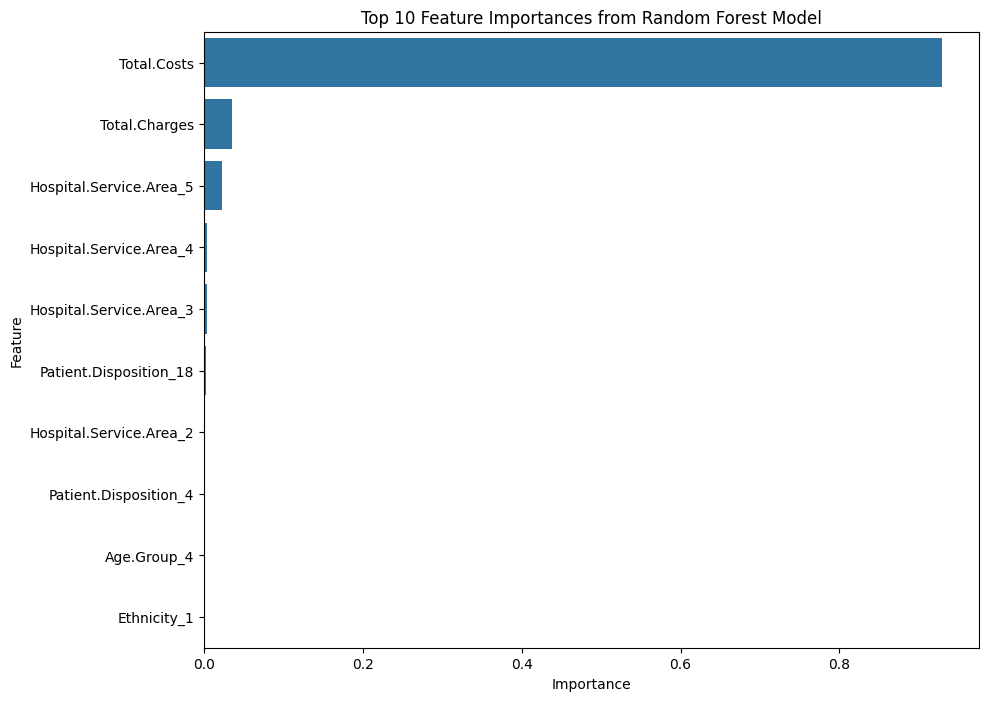

In [32]:
#Top 10 Feature Importances
feature_importances = rf_model.feature_importances_


feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))


feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


top_10_features_df = feature_importances_df.sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features_df)
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.show()